In [20]:
from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

In [21]:
import pymc as pc
delta = 0.5
mu = 10.
lmb = pc.Gamma('lmb', alpha=delta, beta=delta/mu)
Y = pc.Poisson('Y', mu=lmb)

In [22]:
m = pc.Model([mu, lmb, Y])

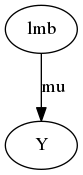

In [23]:
viewPydot(pc.graph.dag(m))

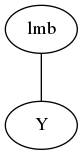

In [24]:
viewPydot(pc.graph.moral_graph(m))

In [27]:
import numpy as np
import random as rn


# number of classes
K = 10

# number of features
V = 2
   
# number of points
D = 5
   
# prior on class dist
alpha = np.ones(K)  
   
# prior on feature dist
beta = np.ones(V)  
   
Nd = [2]*5


   
pi = pc.CompletedDirichlet("pi",   
                               pc.Dirichlet("alpha", theta=alpha))  

phi = pc.Container([pc.CompletedDirichlet("mu_%i" % k,   
                      pc.Dirichlet("alpha_%i" % k, theta=beta))  
           for k in range(K)])  
   
#for each document, draw a topic z_m  
y = pc.Container([pc.Categorical("y_%i" % d,  
                                  p = pi,  
                                  value = rn.randint(0,K-1))  
                  for d in range(D)])  
   
#for each document, draw words, based on topic z_m  
w = pc.Container([pc.Categorical("x_%i_%i" % (d,i),  
                                  p = pc.Lambda("_",
                                                lambda z=y[d], phi=phi : phi[z]),  
                                  #value=collection[d][i],  
                                  observed=False)  
                  for d in range(D) for i in range(Nd[d])])  
   

model = pc.Model([pi, phi, z, w])  

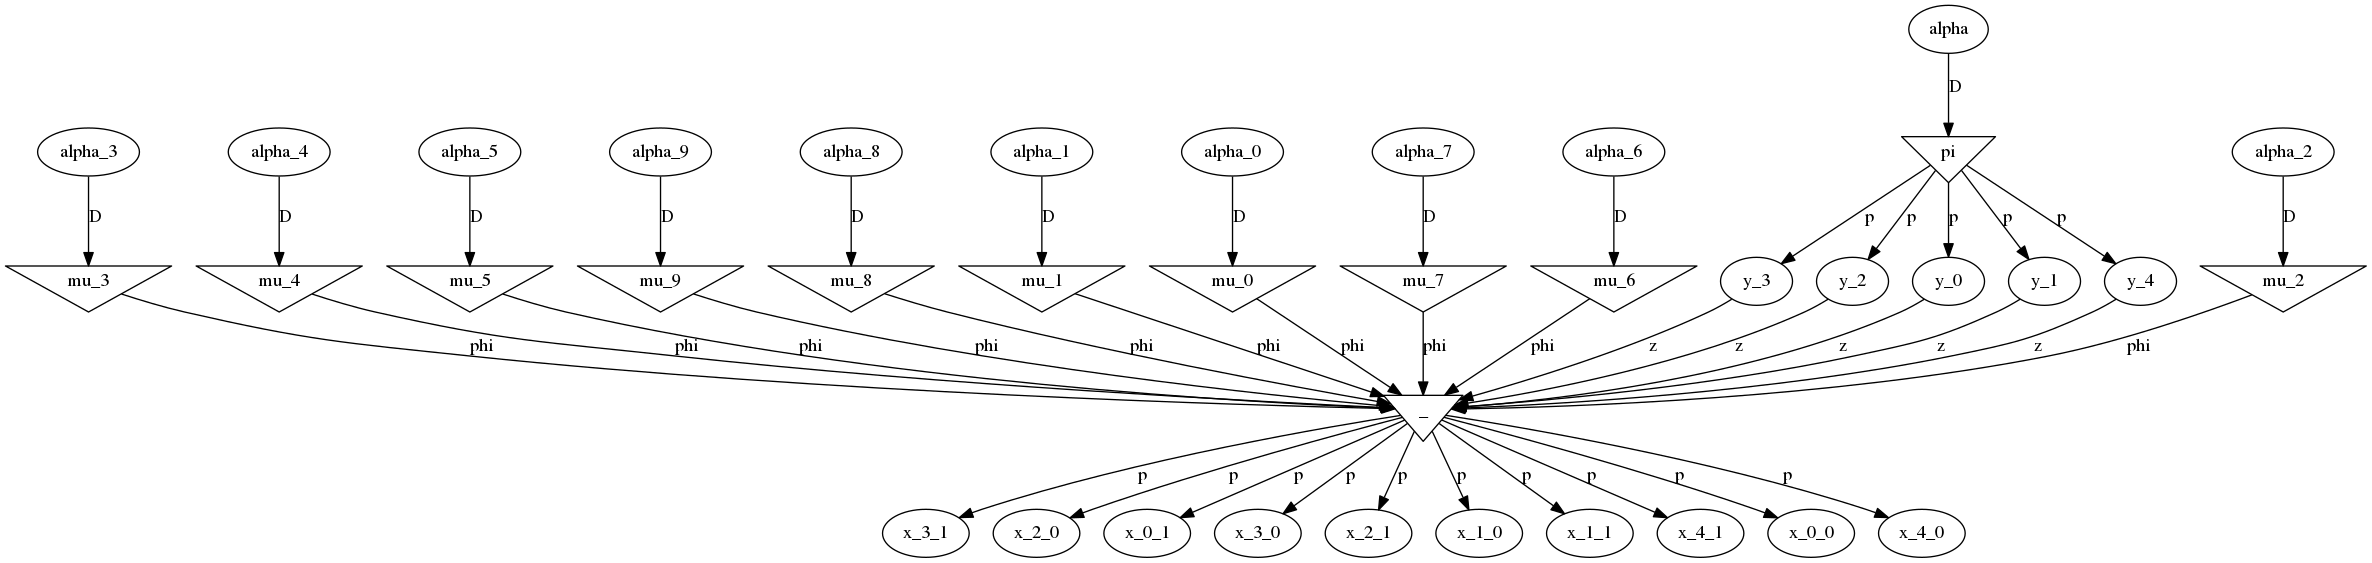

In [28]:
viewPydot(pc.graph.dag(model))